In [1]:
import pandas as pd 
import numpy as np 
import math

In [2]:
# import pyodbc
# server = '192.168.10.199\sql2019'  # database server
# database = 'Sib360Data'     # database name
# username = 'sa'             # database user
# password = 'PAYA+master'    # database password

# # Create a connection string
# connection_string = f'DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}'

# # Establish the connection
# connection = pyodbc.connect(connection_string)

# # Create a cursor from the connection
# cursor = connection.cursor()

# # Example query
# query = """select HDR.IdIvcHdr, HDR.IdPrsClient, HDR.DscClient, dtl.ConfirmedAmount,
# GDS.DscGds, GDS.IdGds, HDR.Dt_Define, Label.Name, label.IdLabel, CPIV.Value Minn
# from SlsIvcHdr HDR inner join SlsIvcDtl DTL on HDR.IdIvcHdr=DTL.IdIvcHdr inner join GdsSpc GDS on DTL.IdGds = GDS.IdGds
# Inner join LabelToItem LTI on GDS.IdGds = LTI.IdItem
# Inner join Label on LTI.IdLabel = Label.IdLabel
# inner join ClassPropItemValue CPIV on GDS.IdGds = CPIV.IdItem 
# where
# CPIV.IdClassProp = 1002501   --1003201, 1002501
# and 
# HDR.DscClient LIKE N'%سیب%'
# or HDR.DscClient Like N'%راسپر جلال%'
# or HDR.DscClient = N'راسپر یوسف آباد'
# or HDR.DscClient like N'%امام حسین%'
# or HDR.DscClient like N'%شیراز جنوبی%'
# ORDER BY HDR.Dt_Define
# """

# # Execute the query
# cursor.execute(query)

# # Fetch the results
# results = cursor.fetchall()

# df = []
# # Do something with the results
# for row in results:
#     df.append(row)

# # Close the cursor
# cursor.close()

# # Close the connection
# connection.close()

In [2]:
df = pd.read_csv('data.csv', header=None)
columns = ['IdHdr', 'IdClient', 'ClientName', 'Amount', 'DscItem', 'IdItem', 'Date', 'ItemType', 'IdItemType','min']
df.columns = columns
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d %H:%M:%S.%f')
df['Date'] = df["Date"].dt.date
df

,IdHdr,IdClient,ClientName,Amount,DscItem,IdItem,Date,ItemType,IdItemType,min
0,37201,21697122,امید سیب عباس اباد فکری,5.0,سالاد مرغ گریل م,1063201,2023-04-09,روزانه,201,1.0
1,37201,21697122,امید سیب عباس اباد فکری,2.0,سالاد اسفناج - م,1063001,2023-04-09,روزانه,201,1.0
2,37201,21697122,امید سیب عباس اباد فکری,5.0,سالاد سبز,1063101,2023-04-09,روزانه,201,1.0
3,37201,21697122,امید سیب عباس اباد فکری,4.0,کاهو پیچ فرش گاردن,1063301,2023-04-09,روزانه,201,1.0
4,37201,21697122,امید سیب عباس اباد فکری,2.0,بیبی اسفناج فرش گاردن,1062901,2023-04-09,روزانه,201,1.0
...,...,...,...,...,...,...,...,...,...,...
94370,5304301,21740822,شیراز جنوبی - وحید رضوی زاده,6.0,گوشت استیکی چانو,1053601,2023-11-23,یخچالی,1,6.0
94371,5304301,21740822,شیراز جنوبی - وحید رضوی زاده,10.0,پودر پیتزای بهسان,1166401,2023-11-23,یخچالی,1,10.0
94372,5304301,21740822,شیراز جنوبی - وحید رضوی زاده,10.0,پودر پیتزای بهسان,1166401,2023-11-23,یخچالی,1,10.0
94373,5304301,21740822,شیراز جنوبی - وحید رضوی زاده,1.0,ادویه سیب زمینی تنو,1062001,2023-11-23,یخچالی,1,1.0


In [3]:
# sort values base on date column 
df = df.sort_values(by='Date')

In [4]:
df

,IdHdr,IdClient,ClientName,Amount,DscItem,IdItem,Date,ItemType,IdItemType,min
0,37201,21697122,امید سیب عباس اباد فکری,5.0,سالاد مرغ گریل م,1063201,2023-04-09,روزانه,201,1.0
1,37201,21697122,امید سیب عباس اباد فکری,2.0,سالاد اسفناج - م,1063001,2023-04-09,روزانه,201,1.0
2,37201,21697122,امید سیب عباس اباد فکری,5.0,سالاد سبز,1063101,2023-04-09,روزانه,201,1.0
3,37201,21697122,امید سیب عباس اباد فکری,4.0,کاهو پیچ فرش گاردن,1063301,2023-04-09,روزانه,201,1.0
4,37201,21697122,امید سیب عباس اباد فکری,2.0,بیبی اسفناج فرش گاردن,1062901,2023-04-09,روزانه,201,1.0
...,...,...,...,...,...,...,...,...,...,...
94342,5303801,21740822,شیراز جنوبی - وحید رضوی زاده,10.0,سالاد سزار م,1057001,2023-11-23,روزانه,201,1.0
94343,5303801,21740822,شیراز جنوبی - وحید رضوی زاده,5.0,سالاد یونانی م,1178701,2023-11-23,روزانه,201,1.0
94344,5303801,21740822,شیراز جنوبی - وحید رضوی زاده,5.0,سالاد یونانی م,1178701,2023-11-23,روزانه,201,1.0
94346,5303901,21740822,شیراز جنوبی - وحید رضوی زاده,3.0,بیبی اسفناج,1057301,2023-11-23,روزانه,201,1.0


Get today datetime 

In [5]:
from datetime import datetime
print(datetime.today().date())

2024-01-28


calculate last day - now 

In [6]:
datetime.today().date() - df['Date'].iloc[-1]

datetime.timedelta(days=66)

In [7]:
df['Date'].iloc[-1]

datetime.date(2023, 11, 23)

Change now date to a day after last dataframe day

In [8]:
now = pd.to_datetime('2023-11-24')
now = now.date()
print(now - df['Date'].iloc[-1])

1 day, 0:00:00


In [9]:
df['Recently'] = now - df['Date']
df

,IdHdr,IdClient,ClientName,Amount,DscItem,IdItem,Date,ItemType,IdItemType,min,Recently
0,37201,21697122,امید سیب عباس اباد فکری,5.0,سالاد مرغ گریل م,1063201,2023-04-09,روزانه,201,1.0,229 days
1,37201,21697122,امید سیب عباس اباد فکری,2.0,سالاد اسفناج - م,1063001,2023-04-09,روزانه,201,1.0,229 days
2,37201,21697122,امید سیب عباس اباد فکری,5.0,سالاد سبز,1063101,2023-04-09,روزانه,201,1.0,229 days
3,37201,21697122,امید سیب عباس اباد فکری,4.0,کاهو پیچ فرش گاردن,1063301,2023-04-09,روزانه,201,1.0,229 days
4,37201,21697122,امید سیب عباس اباد فکری,2.0,بیبی اسفناج فرش گاردن,1062901,2023-04-09,روزانه,201,1.0,229 days
...,...,...,...,...,...,...,...,...,...,...,...
94342,5303801,21740822,شیراز جنوبی - وحید رضوی زاده,10.0,سالاد سزار م,1057001,2023-11-23,روزانه,201,1.0,1 days
94343,5303801,21740822,شیراز جنوبی - وحید رضوی زاده,5.0,سالاد یونانی م,1178701,2023-11-23,روزانه,201,1.0,1 days
94344,5303801,21740822,شیراز جنوبی - وحید رضوی زاده,5.0,سالاد یونانی م,1178701,2023-11-23,روزانه,201,1.0,1 days
94346,5303901,21740822,شیراز جنوبی - وحید رضوی زاده,3.0,بیبی اسفناج,1057301,2023-11-23,روزانه,201,1.0,1 days


In [10]:
def make_true(column):
    if column.days > 61:
        return False
    else:
        return True
df['Assess'] = df['Recently'].apply(make_true)

In [11]:
df1 = df[df['Assess'] == True]

In [12]:
df1

,IdHdr,IdClient,ClientName,Amount,DscItem,IdItem,Date,ItemType,IdItemType,min,Recently,Assess
69066,2727701,21707222,سیب تهرانپارس مهیار زارع پور,30.0,نان مک برگر,1183701,2023-09-24,روزانه,201,30.0,61 days,True
69067,2727701,21707222,سیب تهرانپارس مهیار زارع پور,24.0,نان نیم تخت ساندویچ,1183801,2023-09-24,روزانه,201,24.0,61 days,True
69068,2727801,21712522,سیب حکیمیه رضا طهرانی,4.0,قارچ اسلایس,1167101,2023-09-24,روزانه,201,1.0,61 days,True
69069,2727801,21712522,سیب حکیمیه رضا طهرانی,1.0,بیبی اسفناج,1057301,2023-09-24,روزانه,201,1.0,61 days,True
69070,2727801,21712522,سیب حکیمیه رضا طهرانی,1.0,کاهو پیچ,1057501,2023-09-24,روزانه,201,1.0,61 days,True
...,...,...,...,...,...,...,...,...,...,...,...,...
94342,5303801,21740822,شیراز جنوبی - وحید رضوی زاده,10.0,سالاد سزار م,1057001,2023-11-23,روزانه,201,1.0,1 days,True
94343,5303801,21740822,شیراز جنوبی - وحید رضوی زاده,5.0,سالاد یونانی م,1178701,2023-11-23,روزانه,201,1.0,1 days,True
94344,5303801,21740822,شیراز جنوبی - وحید رضوی زاده,5.0,سالاد یونانی م,1178701,2023-11-23,روزانه,201,1.0,1 days,True
94346,5303901,21740822,شیراز جنوبی - وحید رضوی زاده,3.0,بیبی اسفناج,1057301,2023-11-23,روزانه,201,1.0,1 days,True


In [13]:
# see how many unique Clientname we have
len(df1['ClientName'].unique())

66

In [14]:
list_names = df1['ClientName'].unique()

In [15]:
list_items = df1['DscItem'].unique()

In [16]:
list_items_id = df1['IdItem'].unique()

In [17]:
amounts = df1[(df1['ClientName'] == list_names[0]) & (df1['DscItem'] == list_items[0])]['Amount']
amounts.std(), amounts.mean()

(0.0, 30.0)

In [18]:
import warnings 
warnings.filterwarnings('ignore')

In [19]:
df1['Mean'] = 0.
df1['Std'] = 0.

In [20]:
for name in list_names[0:]:
    for item in list_items[0:]:
        if item in (df1[df1['ClientName'] == name]['DscItem'].unique()):
            items = df1[(df1['ClientName']==name) & (df1['DscItem']==item)]['Amount']
            mean = items.mean()
            std = items.std()
            print(f"mean: {mean}, std: {std}")
            df1.loc[(df1['ClientName'] == name) & (df1['DscItem'] == item), 'Mean'] = mean
            df1.loc[(df1['ClientName'] == name) & (df1['DscItem'] == item), 'Std'] = std

mean: 30.0, std: 0.0
mean: 24.0, std: 0.0
mean: 6.027777777777778, std: 2.9615257757843207
mean: 1.2727272727272727, std: 0.46709936649691375
mean: 1.6333333333333333, std: 0.6686751354593718
mean: 4.128205128205129, std: 2.0923354765163253
mean: 10.680000000000001, std: 5.080338778591754
mean: 7.466666666666668, std: 2.491196621316874
mean: 1.6666666666666667, std: 0.6154574548966636
mean: 1.3571428571428572, std: 0.7007648882267351
mean: 34.074074074074076, std: 17.377983254517826
mean: 6.0, std: 0.0
mean: 7.0, std: 0.0
mean: 12.592105263157896, std: 5.610883846940663
mean: 26.52173913043478, std: 10.706283478819984
mean: 7.0, std: 0.0
mean: 8.0, std: nan
mean: 7.567391304347827, std: 2.3921086502218922
mean: 2.7857142857142856, std: 0.892582375303981
mean: 6.666666666666667, std: 2.439750182371333
mean: 1237.5, std: 609.302880347697
mean: 9.0, std: 0.0
mean: 13.88888888888889, std: 5.0163132570455025
mean: 16.5, std: 0.0
mean: 8.0, std: 0.0
mean: 1.3928571428571428, std: 0.497347461

In [21]:
list_items[11]

'کالباس مرغ مفیدان'

In [22]:
# see the values for first Client and first item
df1[(df1['ClientName']==list_names[0]) & (df1['DscItem']==list_items[0])][:10]

,IdHdr,IdClient,ClientName,Amount,DscItem,IdItem,Date,ItemType,IdItemType,min,Recently,Assess,Mean,Std
69066,2727701,21707222,سیب تهرانپارس مهیار زارع پور,30.0,نان مک برگر,1183701,2023-09-24,روزانه,201,30.0,61 days,True,30.0,0.0
70036,2765701,21707222,سیب تهرانپارس مهیار زارع پور,30.0,نان مک برگر,1183701,2023-09-25,روزانه,201,30.0,60 days,True,30.0,0.0
69085,2728501,21707222,سیب تهرانپارس مهیار زارع پور,30.0,نان مک برگر,1183701,2023-09-25,روزانه,201,30.0,60 days,True,30.0,0.0
70484,2772201,21707222,سیب تهرانپارس مهیار زارع پور,30.0,نان مک برگر,1183701,2023-09-27,روزانه,201,30.0,58 days,True,30.0,0.0
71305,2789101,21707222,سیب تهرانپارس مهیار زارع پور,30.0,نان مک برگر,1183701,2023-09-28,روزانه,201,30.0,57 days,True,30.0,0.0
71348,2791101,21707222,سیب تهرانپارس مهیار زارع پور,30.0,نان مک برگر,1183701,2023-09-30,روزانه,201,30.0,55 days,True,30.0,0.0
72265,2811201,21707222,سیب تهرانپارس مهیار زارع پور,30.0,نان مک برگر,1183701,2023-10-01,روزانه,201,30.0,54 days,True,30.0,0.0
72889,2822601,21707222,سیب تهرانپارس مهیار زارع پور,30.0,نان مک برگر,1183701,2023-10-02,روزانه,201,30.0,53 days,True,30.0,0.0
73203,2832901,21707222,سیب تهرانپارس مهیار زارع پور,30.0,نان مک برگر,1183701,2023-10-03,روزانه,201,30.0,52 days,True,30.0,0.0
74122,2852601,21707222,سیب تهرانپارس مهیار زارع پور,30.0,نان مک برگر,1183701,2023-10-05,روزانه,201,30.0,50 days,True,30.0,0.0


In [23]:
df1[(df1['ClientName'] == list_names[0]) & (df1['Mean'] == 1)]

,IdHdr,IdClient,ClientName,Amount,DscItem,IdItem,Date,ItemType,IdItemType,min,Recently,Assess,Mean,Std
69087,2728601,21707222,سیب تهرانپارس مهیار زارع پور,1.0,ادویه سیب زمینی تنو,1062001,2023-09-25,یخچالی,1,1.0,60 days,True,1.0,NaN
74879,2868001,21707222,سیب تهرانپارس مهیار زارع پور,1.0,سس باربیکیو,1057801,2023-10-07,یخچالی,1,1.0,48 days,True,1.0,0.0
75259,2874201,21707222,سیب تهرانپارس مهیار زارع پور,1.0,ریحان خشک ایتالیایی,1176401,2023-10-08,خشک,101,1.0,47 days,True,1.0,0.0
77954,2937501,21707222,سیب تهرانپارس مهیار زارع پور,1.0,فلفل هالوپینو,1046701,2023-10-15,خشک,101,1.0,40 days,True,1.0,0.0
77953,2937501,21707222,سیب تهرانپارس مهیار زارع پور,1.0,ریحان خشک ایتالیایی,1176401,2023-10-15,خشک,101,1.0,40 days,True,1.0,0.0
83733,3082101,21707222,سیب تهرانپارس مهیار زارع پور,1.0,فلفل هالوپینو,1046701,2023-10-29,خشک,101,1.0,26 days,True,1.0,0.0
85962,4134801,21707222,سیب تهرانپارس مهیار زارع پور,1.0,سس باربیکیو,1057801,2023-11-04,یخچالی,1,1.0,20 days,True,1.0,0.0
86524,4144501,21707222,سیب تهرانپارس مهیار زارع پور,1.0,ریحان خشک ایتالیایی,1176401,2023-11-05,خشک,101,1.0,19 days,True,1.0,0.0
92089,5257501,21707222,سیب تهرانپارس مهیار زارع پور,1.0,سس باربیکیو,1057801,2023-11-18,یخچالی,1,1.0,6 days,True,1.0,0.0
92512,5265601,21707222,سیب تهرانپارس مهیار زارع پور,1.0,فلفل هالوپینو,1046701,2023-11-19,خشک,101,1.0,5 days,True,1.0,0.0


In [24]:
df1['Std'] = df1['Std'].fillna(0)

In [25]:
df1

,IdHdr,IdClient,ClientName,Amount,DscItem,IdItem,Date,ItemType,IdItemType,min,Recently,Assess,Mean,Std
69066,2727701,21707222,سیب تهرانپارس مهیار زارع پور,30.0,نان مک برگر,1183701,2023-09-24,روزانه,201,30.0,61 days,True,30.000000,0.000000
69067,2727701,21707222,سیب تهرانپارس مهیار زارع پور,24.0,نان نیم تخت ساندویچ,1183801,2023-09-24,روزانه,201,24.0,61 days,True,24.000000,0.000000
69068,2727801,21712522,سیب حکیمیه رضا طهرانی,4.0,قارچ اسلایس,1167101,2023-09-24,روزانه,201,1.0,61 days,True,4.540000,2.800947
69069,2727801,21712522,سیب حکیمیه رضا طهرانی,1.0,بیبی اسفناج,1057301,2023-09-24,روزانه,201,1.0,61 days,True,1.000000,0.000000
69070,2727801,21712522,سیب حکیمیه رضا طهرانی,1.0,کاهو پیچ,1057501,2023-09-24,روزانه,201,1.0,61 days,True,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94342,5303801,21740822,شیراز جنوبی - وحید رضوی زاده,10.0,سالاد سزار م,1057001,2023-11-23,روزانه,201,1.0,1 days,True,6.743590,3.212944
94343,5303801,21740822,شیراز جنوبی - وحید رضوی زاده,5.0,سالاد یونانی م,1178701,2023-11-23,روزانه,201,1.0,1 days,True,3.371429,1.737660
94344,5303801,21740822,شیراز جنوبی - وحید رضوی زاده,5.0,سالاد یونانی م,1178701,2023-11-23,روزانه,201,1.0,1 days,True,3.371429,1.737660
94346,5303901,21740822,شیراز جنوبی - وحید رضوی زاده,3.0,بیبی اسفناج,1057301,2023-11-23,روزانه,201,1.0,1 days,True,1.550000,0.840434


In [26]:
# initial criterion with 2 for deafault for all values 
df1['StdCriterion'] = 2.0

In [27]:
df1['Max'] = (df1['Std'] * df1['StdCriterion']) + df1['Mean']
df1['Max'] = df1['Max'].apply(lambda x: math.ceil(x))

In [28]:
df1.head()

,IdHdr,IdClient,ClientName,Amount,DscItem,IdItem,Date,ItemType,IdItemType,min,Recently,Assess,Mean,Std,StdCriterion,Max
69066,2727701,21707222,سیب تهرانپارس مهیار زارع پور,30.0,نان مک برگر,1183701,2023-09-24,روزانه,201,30.0,61 days,True,30.00,0.000000,2.0,30
69067,2727701,21707222,سیب تهرانپارس مهیار زارع پور,24.0,نان نیم تخت ساندویچ,1183801,2023-09-24,روزانه,201,24.0,61 days,True,24.00,0.000000,2.0,24
69068,2727801,21712522,سیب حکیمیه رضا طهرانی,4.0,قارچ اسلایس,1167101,2023-09-24,روزانه,201,1.0,61 days,True,4.54,2.800947,2.0,11
69069,2727801,21712522,سیب حکیمیه رضا طهرانی,1.0,بیبی اسفناج,1057301,2023-09-24,روزانه,201,1.0,61 days,True,1.00,0.000000,2.0,1
69070,2727801,21712522,سیب حکیمیه رضا طهرانی,1.0,کاهو پیچ,1057501,2023-09-24,روزانه,201,1.0,61 days,True,1.00,0.000000,2.0,1


In [29]:
df1[(df1['ClientName']==list_names[20]) & (df1['DscItem']==list_items[1])]

,IdHdr,IdClient,ClientName,Amount,DscItem,IdItem,Date,ItemType,IdItemType,min,Recently,Assess,Mean,Std,StdCriterion,Max
71682,2798401,21724322,سیب نیایش امیر جلالی,24.0,نان نیم تخت ساندویچ,1183801,2023-09-30,روزانه,201,24.0,55 days,True,24.0,0.0,2.0,24
74359,2856301,21724322,سیب نیایش امیر جلالی,24.0,نان نیم تخت ساندویچ,1183801,2023-10-05,روزانه,201,24.0,50 days,True,24.0,0.0,2.0,24


In [39]:
import requests

# Replace this with the actual URL where your Flask API is running
api_url = "http://localhost:5000/get_max_data"

# Make a GET request to the API
response = requests.get(api_url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the JSON response
    result_json = response.json()

    # Now you can work with the data as needed
    print(result_json)
else:
    # Print an error message if the request was not successful
    print(f"Error: {response.status_code}, {response.text}")

{'data': '[{"IdClient":21707222,"IdItem":1183701,"IdItemType":201,"min":30.0,"Std":0.0,"StdCriterion":2.0,"Max":30},{"IdClient":21707222,"IdItem":1183801,"IdItemType":201,"min":24.0,"Std":0.0,"StdCriterion":2.0,"Max":24},{"IdClient":21712522,"IdItem":1167101,"IdItemType":201,"min":1.0,"Std":2.8009473616,"StdCriterion":2.0,"Max":11},{"IdClient":21712522,"IdItem":1057301,"IdItemType":201,"min":1.0,"Std":0.0,"StdCriterion":2.0,"Max":1},{"IdClient":21712522,"IdItem":1057501,"IdItemType":201,"min":1.0,"Std":0.0,"StdCriterion":2.0,"Max":1},{"IdClient":21714922,"IdItem":1167101,"IdItemType":201,"min":1.0,"Std":1.9250052367,"StdCriterion":2.0,"Max":9},{"IdClient":21712522,"IdItem":1183701,"IdItemType":201,"min":30.0,"Std":0.0,"StdCriterion":2.0,"Max":30},{"IdClient":21712522,"IdItem":1183801,"IdItemType":201,"min":24.0,"Std":0.0,"StdCriterion":2.0,"Max":24},{"IdClient":21742522,"IdItem":1178701,"IdItemType":201,"min":1.0,"Std":0.7698003589,"StdCriterion":2.0,"Max":4},{"IdClient":21742522,"IdIt

In [49]:
import requests
import numpy as np

# Replace this with the actual URL where your Flask API for predictions is running
api_url = "http://localhost:5001/get_predictions"

# Example input data with numpy.int32 values
input_data = {
    'id_client': int(np.int32(21742022)),
    'id_itemtype': int(np.int32(201))
}

# Make a POST request to the API
response = requests.post(api_url, json=input_data)
print(f"response: {response}")
# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the JSON response
    result_json = response.json()

    # Now you can work with the prediction result as needed
    print(result_json)
else:
    # Print an error message if the request was not successful
    print(f"Error: {response.status_code}, {response.text}")

response: <Response [200]>
{'1056901': 2.0, '1057001': 3.0, '1178701': 2.0, '1183701': 30.0, '1183801': 24.0}


In [36]:
max_df = df1[['IdClient', 'ClientName', 'IdItem', 'DscItem', 'IdItemType', 'min', 'Std', 'StdCriterion', 'Max']]
max_df = max_df.drop_duplicates()
# max_df.sort_values(by=max_df['IdClient'])
max_df

,IdClient,ClientName,IdItem,DscItem,IdItemType,min,Std,StdCriterion,Max
69066,21707222,سیب تهرانپارس مهیار زارع پور,1183701,نان مک برگر,201,30.0,0.000000,2.0,30
69067,21707222,سیب تهرانپارس مهیار زارع پور,1183801,نان نیم تخت ساندویچ,201,24.0,0.000000,2.0,24
69068,21712522,سیب حکیمیه رضا طهرانی,1167101,قارچ اسلایس,201,1.0,2.800947,2.0,11
69069,21712522,سیب حکیمیه رضا طهرانی,1057301,بیبی اسفناج,201,1.0,0.000000,2.0,1
69070,21712522,سیب حکیمیه رضا طهرانی,1057501,کاهو پیچ,201,1.0,0.000000,2.0,1
...,...,...,...,...,...,...,...,...,...
93786,21742122,. سیب جهان ارا بهروز رستمی,1059301,ساشه کچاپ تند 300 عددی,101,300.0,0.000000,2.0,300
93843,21750922,سیب شعبه مشهد شرکت نوین سازه عرفان ندا (شعبه م...,1058201,سس سالاد سزار,1,5.0,0.000000,2.0,5
93758,21740822,شیراز جنوبی - وحید رضوی زاده,1050801,جعبه سوپر فرایز سالن,101,250.0,0.000000,2.0,250
93856,21750922,سیب شعبه مشهد شرکت نوین سازه عرفان ندا (شعبه م...,1062701,چیکن پاپ کورن پنیری,1,2.5,0.000000,2.0,5


In [31]:
df1[(df1['IdClient']==21724322) & (df1['IdItem']==1183801)].iloc[0].Max

24

In [32]:
df1

,IdHdr,IdClient,ClientName,Amount,DscItem,IdItem,Date,ItemType,IdItemType,min,Recently,Assess,Mean,Std,StdCriterion,Max
69066,2727701,21707222,سیب تهرانپارس مهیار زارع پور,30.0,نان مک برگر,1183701,2023-09-24,روزانه,201,30.0,61 days,True,30.000000,0.000000,2.0,30
69067,2727701,21707222,سیب تهرانپارس مهیار زارع پور,24.0,نان نیم تخت ساندویچ,1183801,2023-09-24,روزانه,201,24.0,61 days,True,24.000000,0.000000,2.0,24
69068,2727801,21712522,سیب حکیمیه رضا طهرانی,4.0,قارچ اسلایس,1167101,2023-09-24,روزانه,201,1.0,61 days,True,4.540000,2.800947,2.0,11
69069,2727801,21712522,سیب حکیمیه رضا طهرانی,1.0,بیبی اسفناج,1057301,2023-09-24,روزانه,201,1.0,61 days,True,1.000000,0.000000,2.0,1
69070,2727801,21712522,سیب حکیمیه رضا طهرانی,1.0,کاهو پیچ,1057501,2023-09-24,روزانه,201,1.0,61 days,True,1.000000,0.000000,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94342,5303801,21740822,شیراز جنوبی - وحید رضوی زاده,10.0,سالاد سزار م,1057001,2023-11-23,روزانه,201,1.0,1 days,True,6.743590,3.212944,2.0,14
94343,5303801,21740822,شیراز جنوبی - وحید رضوی زاده,5.0,سالاد یونانی م,1178701,2023-11-23,روزانه,201,1.0,1 days,True,3.371429,1.737660,2.0,7
94344,5303801,21740822,شیراز جنوبی - وحید رضوی زاده,5.0,سالاد یونانی م,1178701,2023-11-23,روزانه,201,1.0,1 days,True,3.371429,1.737660,2.0,7
94346,5303901,21740822,شیراز جنوبی - وحید رضوی زاده,3.0,بیبی اسفناج,1057301,2023-11-23,روزانه,201,1.0,1 days,True,1.550000,0.840434,2.0,4


#### Create model and training it to predict what items will be requested for each client in feature

##### it should contains 3 model for each clinet, first model for itemtype(1), second for itemtype(101), and last for item type(201)


In [33]:
import pandas as pd
import numpy as np

In [34]:
# df = pd.read_csv('data.csv', header=None)
# columns = ['IdHdr', 'IdClient', 'ClientName', 'Amount', 'DscItem', 'IdItem', 'Date', 'ItemType', 'IdItemType','min']
# df.columns = columns
# df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d %H:%M:%S.%f')
# df['Date'] = df["Date"].dt.date
# df

In [35]:
df1['IdClient'] = df1['IdClient'].astype(str)
df1['IdItem'] = df1['IdItem'].astype(str)
df1['Date'] = df1['Date'].astype(str)

In [36]:
len_client = len(df1['IdClient'].iloc[0]) 
len_item = len(df1['IdItem'].iloc[0])
len_client, len_item

(8, 7)

In [37]:
update_df = df1[['IdHdr', 'IdClient', 'IdItem', 'ItemType', 'Date']].groupby('IdHdr', as_index=True).sum()
update_df

,IdClient,IdItem,ItemType,Date
IdHdr,,,,
2727001,21697122216971222169712221697122,1063101106320110633011062901,روزانهروزانهروزانهروزانه,2023-09-242023-09-242023-09-242023-09-24
2727101,21697122,1183701,روزانه,2023-09-24
2727201,217003222170032221700322,116710110573011057001,روزانهروزانهروزانه,2023-09-242023-09-242023-09-24
2727301,2170032221700322,11838011183701,روزانهروزانه,2023-09-242023-09-24
2727401,21701622,1178701,روزانه,2023-09-24
...,...,...,...,...
5303901,2174082221740822,10573011057301,روزانهروزانه,2023-11-232023-11-23
5304001,2174082221740822,10573011057301,روزانهروزانه,2023-11-232023-11-23
5304101,21740822217408222174082221740822,1183801118380111837011183701,روزانهروزانهروزانهروزانه,2023-11-232023-11-232023-11-232023-11-23


#### make id client

In [38]:
update_df['IdClient'] = update_df['IdClient'].apply(lambda x:  x[:len_client])
update_df

,IdClient,IdItem,ItemType,Date
IdHdr,,,,
2727001,21697122,1063101106320110633011062901,روزانهروزانهروزانهروزانه,2023-09-242023-09-242023-09-242023-09-24
2727101,21697122,1183701,روزانه,2023-09-24
2727201,21700322,116710110573011057001,روزانهروزانهروزانه,2023-09-242023-09-242023-09-24
2727301,21700322,11838011183701,روزانهروزانه,2023-09-242023-09-24
2727401,21701622,1178701,روزانه,2023-09-24
...,...,...,...,...
5303901,21740822,10573011057301,روزانهروزانه,2023-11-232023-11-23
5304001,21740822,10573011057301,روزانهروزانه,2023-11-232023-11-23
5304101,21740822,1183801118380111837011183701,روزانهروزانهروزانهروزانه,2023-11-232023-11-232023-11-232023-11-23


In [39]:
string = update_df['IdItem'][2727001]
string

'1063101106320110633011062901'

In [40]:
def make_item(string):
    formatted_string = '-'.join([string[i:i+len_item] for i in range(0, len(string), len_item)])
    return formatted_string

update_df['IdItem'] = update_df['IdItem'].apply(make_item)
update_df

,IdClient,IdItem,ItemType,Date
IdHdr,,,,
2727001,21697122,1063101-1063201-1063301-1062901,روزانهروزانهروزانهروزانه,2023-09-242023-09-242023-09-242023-09-24
2727101,21697122,1183701,روزانه,2023-09-24
2727201,21700322,1167101-1057301-1057001,روزانهروزانهروزانه,2023-09-242023-09-242023-09-24
2727301,21700322,1183801-1183701,روزانهروزانه,2023-09-242023-09-24
2727401,21701622,1178701,روزانه,2023-09-24
...,...,...,...,...
5303901,21740822,1057301-1057301,روزانهروزانه,2023-11-232023-11-23
5304001,21740822,1057301-1057301,روزانهروزانه,2023-11-232023-11-23
5304101,21740822,1183801-1183801-1183701-1183701,روزانهروزانهروزانهروزانه,2023-11-232023-11-232023-11-232023-11-23


In [41]:
def make_type(string):
    if 'روزانه' in string:
        return 201
    elif 'یخچالی' in string:
        return 1
    else:
        return 101

In [42]:
update_df['ItemType'] = update_df['ItemType'].apply(make_type)

In [43]:
update_df

,IdClient,IdItem,ItemType,Date
IdHdr,,,,
2727001,21697122,1063101-1063201-1063301-1062901,201,2023-09-242023-09-242023-09-242023-09-24
2727101,21697122,1183701,201,2023-09-24
2727201,21700322,1167101-1057301-1057001,201,2023-09-242023-09-242023-09-24
2727301,21700322,1183801-1183701,201,2023-09-242023-09-24
2727401,21701622,1178701,201,2023-09-24
...,...,...,...,...
5303901,21740822,1057301-1057301,201,2023-11-232023-11-23
5304001,21740822,1057301-1057301,201,2023-11-232023-11-23
5304101,21740822,1183801-1183801-1183701-1183701,201,2023-11-232023-11-232023-11-232023-11-23


In [44]:
def make_date(column):
    date = column[0:10]
    return date 

update_df['Date'] = update_df['Date'].apply(make_date)
update_df

,IdClient,IdItem,ItemType,Date
IdHdr,,,,
2727001,21697122,1063101-1063201-1063301-1062901,201,2023-09-24
2727101,21697122,1183701,201,2023-09-24
2727201,21700322,1167101-1057301-1057001,201,2023-09-24
2727301,21700322,1183801-1183701,201,2023-09-24
2727401,21701622,1178701,201,2023-09-24
...,...,...,...,...
5303901,21740822,1057301-1057301,201,2023-11-23
5304001,21740822,1057301-1057301,201,2023-11-23
5304101,21740822,1183801-1183801-1183701-1183701,201,2023-11-23


In [45]:
update_df['IdItem'].iloc[0].split('-')

['1063101', '1063201', '1063301', '1062901']

In [46]:
def make_item(column):
    column = column.split('-')
    for i, item in enumerate(column):
        item = int(item)
        column[i] = item
    return column

In [47]:
update_df['IdItem'] = update_df['IdItem'].apply(make_item)

In [48]:
update_df

,IdClient,IdItem,ItemType,Date
IdHdr,,,,
2727001,21697122,"[1063101, 1063201, 1063301, 1062901]",201,2023-09-24
2727101,21697122,[1183701],201,2023-09-24
2727201,21700322,"[1167101, 1057301, 1057001]",201,2023-09-24
2727301,21700322,"[1183801, 1183701]",201,2023-09-24
2727401,21701622,[1178701],201,2023-09-24
...,...,...,...,...
5303901,21740822,"[1057301, 1057301]",201,2023-11-23
5304001,21740822,"[1057301, 1057301]",201,2023-11-23
5304101,21740822,"[1183801, 1183801, 1183701, 1183701]",201,2023-11-23


In [49]:
update_df['IdClient'] = update_df['IdClient'].astype(int)
update_df['ItemType'] = update_df['ItemType'].astype(int)

Create train and test dataframes 

In [50]:
update_df['Date'] =  pd.to_datetime(update_df['Date'])
update_df['NewDate'] = update_df["Date"].astype("int64") // 10**9
update_df["Date2"] = pd.to_datetime(update_df["NewDate"], unit="s")

In [51]:
train = update_df[update_df['Date'] < '2023-11-13']
test = update_df[update_df['Date'] >= '2023-11-13']
train.shape, test.shape

((4311, 6), (914, 6))

In [52]:
update_df

,IdClient,IdItem,ItemType,Date,NewDate,Date2
IdHdr,,,,,,
2727001,21697122,"[1063101, 1063201, 1063301, 1062901]",201,2023-09-24,1695513600,2023-09-24
2727101,21697122,[1183701],201,2023-09-24,1695513600,2023-09-24
2727201,21700322,"[1167101, 1057301, 1057001]",201,2023-09-24,1695513600,2023-09-24
2727301,21700322,"[1183801, 1183701]",201,2023-09-24,1695513600,2023-09-24
2727401,21701622,[1178701],201,2023-09-24,1695513600,2023-09-24
...,...,...,...,...,...,...
5303901,21740822,"[1057301, 1057301]",201,2023-11-23,1700697600,2023-11-23
5304001,21740822,"[1057301, 1057301]",201,2023-11-23,1700697600,2023-11-23
5304101,21740822,"[1183801, 1183801, 1183701, 1183701]",201,2023-11-23,1700697600,2023-11-23


In [53]:
X_train, y_train = train[['IdClient', 'ItemType']].values, train['IdItem']
X_test, y_test = test[['IdClient', 'ItemType']].values, test['IdItem']

In [54]:
# X = update_df[['IdClient', 'ItemType']]
# y = update_df[['IdItem']]

In [55]:
# X[:5], # y[:5]

In [56]:
from keras.preprocessing.sequence import pad_sequences

# Pad the target data with zeros to make each row of equal length
max_length = max([len(row) for row in update_df['IdItem']])
y_train = pad_sequences(train['IdItem'], maxlen=max_length, padding='post')
y_test = pad_sequences(test['IdItem'], maxlen=max_length, padding='post')

2024-01-27 14:52:18.869249: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-27 14:52:18.869353: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-27 14:52:18.873626: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-27 14:52:18.894925: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2024-01-27 14:52:20.947710: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [60]:
y_train.shape

(4311, 110)

In [58]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# X_train.shape, y_train.shape, X_test.shape, y_test.shape

In [59]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [61]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [61]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=70)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=70)

In [62]:
predictions = model.predict(X_test)

In [63]:
i = 12

pred = set(predictions[i])
pred.remove(0)
print(f"prediction is: {pred}", end='\n\n')

act = set(y_test[i])
act.remove(0)

print(f"actual: {act}", end='\n\n')

# clinet = int(scaler.inverse_transform(X_test[i].reshape(1, -1))[0][0])
# item_type = int(scaler.inverse_transform(X_test[i].reshape(1, -1))[0][1])
clinet = int(X_test[0][0])
item_type = int(X_test[0][1])

all_items = df1[(df1['IdClient'] == str(clinet)) & (df1['IdItemType']== int(item_type))]['IdItem'].unique()
print(f"All items for this record are:\n {all_items}", end='\n\n')

c = 0
for p in pred:
    for a in act:
        if p == a:
            c += 1
            
print(c, f'items found in actual from {len(pred)} items predicted in actual {len(act)} items ordered')

prediction is: {1057001, 1183701}

actual: {1057001, 1183901}

All items for this record are:
 ['1178701' '1183701' '1183801' '1057001' '1056901' '1183901']

1 items found in actual from 2 items predicted in actual 2 items ordered


In [65]:
overal = 0

In [66]:
common = 0
preds_knn = model.predict(X_test)
for j in range(0, len(preds_knn)):
    pred = set(preds_knn[j])
    pred.remove(0)

    act = set(y_test[j])
    act.remove(0)
    act_items = len(act)
    overal = overal + act_items
    c = 0
    for p in pred:
        for a in act:
            if p == a:
                c += 1
                
    common = common + c            


print(f"common in {i} neighbors is: {common}")

common in 12 neighbors is: 1050


In [66]:
# estimators = [50, 100, 150]
# for i in (estimators):
#     common = 0
#     model = RandomForestClassifier(n_estimators=i)
#     model.fit(X_train, y_train)
#     preds_knn = model.predict(X_test)
#     for j in range(0, len(preds_knn)):
#         pred = set(preds_knn[j])
#         pred.remove(0)

#         act = set(y_test[j])
#         act.remove(0)
#         act_items = len(act)
#         overal = overal + act_items
#         c = 0
#         for p in pred:
#             for a in act:
#                 if p == a:
#                     c += 1
                    
#         common = common + c            


#     print(f"common in {i} neighbors is: {common}")

##### algorithm: Literal['auto', 'ball_tree', 'kd_tree', 'brute']

In [67]:
from sklearn.neighbors import KNeighborsClassifier 
model_knn = KNeighborsClassifier(n_neighbors=1, algorithm='brute')
model_knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', n_neighbors=1)

n_neighbors=1, algorithm='brute'

In [68]:
preds_knn = model_knn.predict(X_test)

In [69]:
import statistics as st

In [70]:
# if we use scaler transform 
# clinet = int(scaler.inverse_transform(X_test[i].reshape(1, -1))[0][0])
# item_type = int(scaler.inverse_transform(X_test[i].reshape(1, -1))[0][1])

In [73]:
i = 10

pred = set(preds_knn[i])
pred.remove(0)
print(f"prediction is: {pred}", end='\n\n')

act = set(y_test[i])
act.remove(0)

print(f"actual: {act}", end='\n\n')

clinet = int(X_test[i][0])
item_type = int(X_test[i][1])

all_items = df1[(df1['IdClient'] == str(clinet)) & (df1['IdItemType']== int(item_type))]['IdItem'].unique()
print(f"All items for this record are:\n {all_items}", end='\n\n')

c = 0
for p in pred:
    for a in act:
        if p == a:
            c += 1
            
print(c, f'items found in actual {len(act)} items ordered', end='\n\n')

final_result = {}
for p in pred:
    amount_p = (df1[df1['IdItem'] == str(p)]['Amount'])
    mode_p = st.mode(amount_p)
    final_result[p] = mode_p


print(f"My final prediction is {final_result}")

prediction is: {1056901, 1057001, 1167101, 1178701, 1057501}

actual: {1057001, 1178701}

All items for this record are:
 ['1056901' '1057001' '1178701' '1057301' '1183701' '1183801' '1057501'
 '1167101' '1183901']

2 items found in actual 2 items ordered

My final prediction is {1056901: 2.0, 1057001: 3.0, 1167101: 3.0, 1178701: 2.0, 1057501: 1.0}


In [74]:
overal = 0
for i in range(1, 11):
    common = 0
    model = KNeighborsClassifier(n_neighbors=i, algorithm='brute')
    model.fit(X_train, y_train)
    preds_knn = model.predict(X_test)
    for j in range(0, len(preds_knn)):
        pred = set(preds_knn[j])
        pred.remove(0)

        act = set(y_test[j])
        act.remove(0)
        act_items = len(act)
        overal = overal + act_items
        c = 0
        for p in pred:
            for a in act:
                if p == a:
                    c += 1
                    
        common = common + c            


    print(f"common in {i} neighbors is: {common}")

common in 1 neighbors is: 2092
common in 2 neighbors is: 1344
common in 3 neighbors is: 1223
common in 4 neighbors is: 1051
common in 5 neighbors is: 1109
common in 6 neighbors is: 1132
common in 7 neighbors is: 1193
common in 8 neighbors is: 1136
common in 9 neighbors is: 1095
common in 10 neighbors is: 1061


In [101]:
# from sklearn.neural_network import MLPClassifier
# from sklearn.neural_network import MLPClassifier
# from sklearn.linear_model import MultiTaskElasticNetCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.multioutput import MultiOutputClassifier

clf = MultiOutputClassifier(GradientBoostingClassifier(n_estimators=50)).fit(X_train, y_train)
clf.fit(X_train, y_train)

In [96]:
preds_svc = clf.predict(X_test)

In [97]:
i = 123

pred = set(preds_svc[i])
pred.remove(0)
print(f"prediction is: {pred}", end='\n\n')

act = set(y_test[i])
act.remove(0)

print(f"actual: {act}", end='\n\n')

clinet = int(X_test[i][0])
item_type = int(X_test[i][1])

all_items = df1[(df1['IdClient'] == str(clinet)) & (df1['IdItemType']== int(item_type))]['IdItem'].unique()
print(f"All items for this record are:\n {all_items}", end='\n\n')

c = 0
for p in pred:
    for a in act:
        if p == a:
            c += 1
            
print(c, f'items found in actual {len(act)} items ordered', end='\n\n')

final_result = {}
for p in pred:
    amount_p = (df1[df1['IdItem'] == str(p)]['Amount'])
    mode_p = st.mode(amount_p)
    final_result[p] = mode_p


print(f"My final prediction is {final_result}")

prediction is: {1183701}

actual: {1183801, 1057301}

All items for this record are:
 ['1178701' '1057001' '1183701' '1183801' '1056901' '1057301' '1057501'
 '1183901']

0 items found in actual 2 items ordered

My final prediction is {1183701: 30.0}


In [98]:
common = 0

In [99]:
for j in range(0, len(preds_knn)):
    pred = set(preds_svc[j])
    pred.remove(0)

    act = set(y_test[j])
    act.remove(0)
    act_items = len(act)
    overal = overal + act_items
    c = 0
    for p in pred:
        for a in act:
            if p == a:
                c += 1
                
    common = common + c            


print(f"common in {i} neighbors is: {common}")

common in 123 neighbors is: 195


In [130]:
len(X_test)

914

In [76]:
overal / 10

4121.0

In [77]:
2092 * 100 / 4121 

50.7643775782577

In [ ]:
id_client = 21742022
id_itemtype = 201
sample = np.array([[id_client, id_itemtype]])
sample 

array([[21742022,      201]])

In [ ]:
model_knn.predict(sample)

array([[1178701, 1183701, 1183801, 1057001, 1056901,       0,       0,
              0,       0,       0,       0,       0,       0,       0,
              0,       0,       0,       0,       0,       0,       0,
              0,       0,       0,       0,       0,       0,       0,
              0,       0,       0,       0,       0,       0,       0,
              0,       0,       0,       0,       0,       0,       0,
              0,       0,       0,       0,       0,       0,       0,
              0,       0,       0,       0,       0,       0,       0,
              0,       0,       0,       0,       0,       0,       0,
              0,       0,       0,       0,       0,       0,       0,
              0,       0,       0,       0,       0,       0,       0,
              0,       0,       0,       0,       0,       0,       0,
              0,       0,       0,       0,       0,       0,       0,
              0,       0,       0,       0,       0,       0,       0,
      

In [ ]:
X_test[0]

array([21742022,      201])

In [ ]:
model_knn.predict([X_test[0]])

array([[1178701, 1183701, 1183801, 1057001, 1056901,       0,       0,
              0,       0,       0,       0,       0,       0,       0,
              0,       0,       0,       0,       0,       0,       0,
              0,       0,       0,       0,       0,       0,       0,
              0,       0,       0,       0,       0,       0,       0,
              0,       0,       0,       0,       0,       0,       0,
              0,       0,       0,       0,       0,       0,       0,
              0,       0,       0,       0,       0,       0,       0,
              0,       0,       0,       0,       0,       0,       0,
              0,       0,       0,       0,       0,       0,       0,
              0,       0,       0,       0,       0,       0,       0,
              0,       0,       0,       0,       0,       0,       0,
              0,       0,       0,       0,       0,       0,       0,
              0,       0,       0,       0,       0,       0,       0,
      

In [564]:
df_machine

,IdHdr,IdClient,ClientName,Amount,DscItem,IdItem,Date,ItemType,IdItemType,min,Recently,Assess
41,40701,21707222,سیب تهرانپارس مهیار زارع پور,5.00,قارچ اسلایس,1167101,2023-04-11,روزانه,201,1.00,"227 days, 0:00:00",False
42,40901,21707222,سیب تهرانپارس مهیار زارع پور,50.00,پنیر پیتزا 202,1061001,2023-04-11,یخچالی,1,10.00,"227 days, 0:00:00",False
43,40901,21707222,سیب تهرانپارس مهیار زارع پور,15.00,همبرگر 202,1054001,2023-04-11,یخچالی,1,5.00,"227 days, 0:00:00",False
44,40901,21707222,سیب تهرانپارس مهیار زارع پور,1.00,پنیر خامه ای ویلی,1061301,2023-04-11,یخچالی,1,1.00,"227 days, 0:00:00",False
45,40901,21707222,سیب تهرانپارس مهیار زارع پور,15.00,پپرونی مکزیکی,1059801,2023-04-11,یخچالی,1,0.85,"227 days, 0:00:00",False
...,...,...,...,...,...,...,...,...,...,...,...,...
93940,5299001,21707222,سیب تهرانپارس مهیار زارع پور,8.50,پپرونی مکزیکی,1059801,2023-11-22,یخچالی,1,0.85,"2 days, 0:00:00",True
93941,5299001,21707222,سیب تهرانپارس مهیار زارع پور,7.00,گوشت رست بیف 70 گرمی,1053801,2023-11-22,یخچالی,1,7.00,"2 days, 0:00:00",True
93942,5299001,21707222,سیب تهرانپارس مهیار زارع پور,20.00,گوشت سینه مرغ مرینیت شده,1053901,2023-11-22,یخچالی,1,10.00,"2 days, 0:00:00",True
93943,5299001,21707222,سیب تهرانپارس مهیار زارع پور,10.25,همبرگر 202,1054001,2023-11-22,یخچالی,1,5.00,"2 days, 0:00:00",True


labels = 201 > roozane


Text(0.5, 1.0, 'The correlation between features')

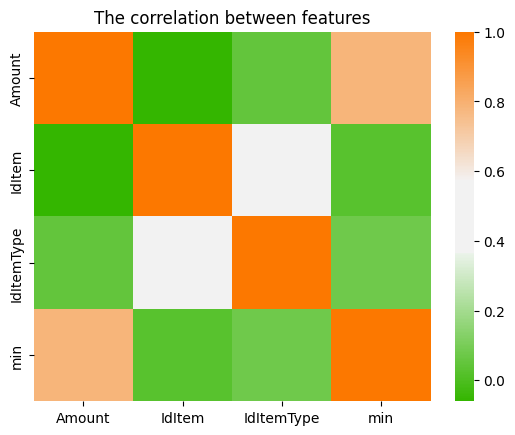

In [592]:
import seaborn as sns
import matplotlib.pyplot as plt 
cmap = sns.diverging_palette(125, 28, s=100, l=65, sep=50, as_cmap=True)
sns.heatmap(df_machine[['Amount', 'IdItem', 'IdItemType', 'min']].corr(), cmap=cmap)
plt.title("The correlation between features")

Text(0.5, 1.0, 'Counts of orders in each category of items')

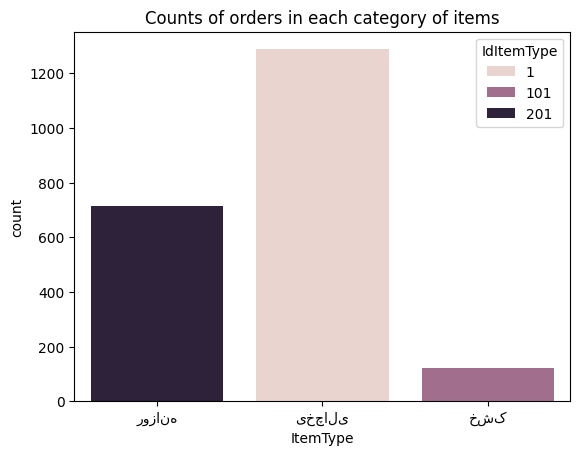

In [590]:
sns.countplot(data=df_machine, x='ItemType', hue='IdItemType');
plt.title("Counts of orders in each category of items")

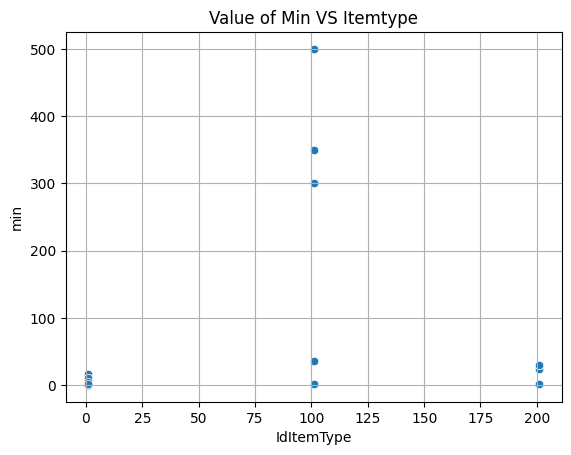

In [589]:
sns.scatterplot(data=df_machine, x='IdItemType', y='min')
plt.title("Value of Min VS Itemtype")
plt.grid(True)

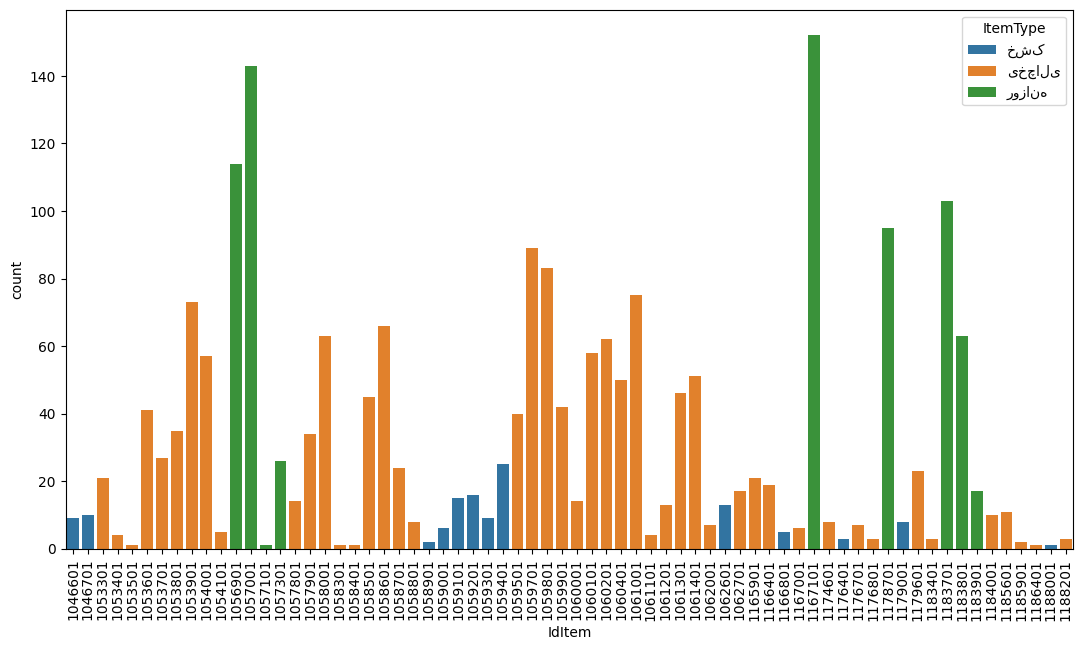

In [641]:
plt.figure(figsize=(13, 7))
sns.countplot(data=df_machine, x='IdItem', hue='ItemType', palette='tab10');
plt.xticks(rotation=90);

In [623]:
# we now see the numbers of yakhchali items is very much more than other categories but roozane items is highest counts of orders 

In [648]:
# lets see some most orders in roozane 
df_machine[df_machine['IdItem'] == 1183701]

,IdHdr,IdClient,ClientName,Amount,DscItem,IdItem,Date,ItemType,IdItemType,min,Recently,Assess
28593,668001,21707222,سیب تهرانپارس مهیار زارع پور,60.0,نان مک برگر,1183701,2023-06-24,روزانه,201,30.0,"153 days, 0:00:00",False
28537,666401,21707222,سیب تهرانپارس مهیار زارع پور,30.0,نان مک برگر,1183701,2023-06-24,روزانه,201,30.0,"153 days, 0:00:00",False
29668,704401,21707222,سیب تهرانپارس مهیار زارع پور,30.0,نان مک برگر,1183701,2023-06-26,روزانه,201,30.0,"151 days, 0:00:00",False
31447,755901,21707222,سیب تهرانپارس مهیار زارع پور,30.0,نان مک برگر,1183701,2023-07-01,روزانه,201,30.0,"146 days, 0:00:00",False
31657,762601,21707222,سیب تهرانپارس مهیار زارع پور,30.0,نان مک برگر,1183701,2023-07-01,روزانه,201,30.0,"146 days, 0:00:00",False
...,...,...,...,...,...,...,...,...,...,...,...,...
91525,5244801,21707222,سیب تهرانپارس مهیار زارع پور,30.0,نان مک برگر,1183701,2023-11-16,روزانه,201,30.0,"8 days, 0:00:00",True
91809,5251601,21707222,سیب تهرانپارس مهیار زارع پور,30.0,نان مک برگر,1183701,2023-11-17,روزانه,201,30.0,"7 days, 0:00:00",True
92610,5269401,21707222,سیب تهرانپارس مهیار زارع پور,30.0,نان مک برگر,1183701,2023-11-19,روزانه,201,30.0,"5 days, 0:00:00",True
93005,5278601,21707222,سیب تهرانپارس مهیار زارع پور,30.0,نان مک برگر,1183701,2023-11-20,روزانه,201,30.0,"4 days, 0:00:00",True


In [649]:
df_roozane = df_machine[df_machine['IdItemType'] == 201]
df_yakhchali = df_machine[df_machine['IdItemType'] == 1]
df_khoshk = df_machine[df_machine['IdItemType'] == 101]

### first we train roozane model

In [658]:
df_roozane

,IdHdr,IdClient,ClientName,Amount,DscItem,IdItem,Date,ItemType,IdItemType,min,Recently,Assess
41,40701,21707222,سیب تهرانپارس مهیار زارع پور,5.0,قارچ اسلایس,1167101,2023-04-11,روزانه,201,1.0,"227 days, 0:00:00",False
881,63901,21707222,سیب تهرانپارس مهیار زارع پور,4.0,سالاد سزار م,1057001,2023-04-15,روزانه,201,1.0,"223 days, 0:00:00",False
882,63901,21707222,سیب تهرانپارس مهیار زارع پور,2.0,سالاد اسکاندیناوی م,1056901,2023-04-15,روزانه,201,1.0,"223 days, 0:00:00",False
513,57401,21707222,سیب تهرانپارس مهیار زارع پور,1.0,سالاد اسکاندیناوی م,1056901,2023-04-15,روزانه,201,1.0,"223 days, 0:00:00",False
512,57401,21707222,سیب تهرانپارس مهیار زارع پور,4.0,سالاد سزار م,1057001,2023-04-15,روزانه,201,1.0,"223 days, 0:00:00",False
...,...,...,...,...,...,...,...,...,...,...,...,...
93315,5285301,21707222,سیب تهرانپارس مهیار زارع پور,3.0,سالاد سزار م,1057001,2023-11-21,روزانه,201,1.0,"3 days, 0:00:00",True
93314,5285301,21707222,سیب تهرانپارس مهیار زارع پور,3.0,قارچ اسلایس,1167101,2023-11-21,روزانه,201,1.0,"3 days, 0:00:00",True
93319,5285401,21707222,سیب تهرانپارس مهیار زارع پور,30.0,نان مک برگر,1183701,2023-11-21,روزانه,201,30.0,"3 days, 0:00:00",True
93689,5293401,21707222,سیب تهرانپارس مهیار زارع پور,1.0,سالاد اسکاندیناوی م,1056901,2023-11-22,روزانه,201,1.0,"2 days, 0:00:00",True


In [747]:
# ma bayad modeli besazim ke ba vared kardane id client va iditemtype be ma listi and item ha va amount ha pishnahad dahad.

In [748]:
df

,IdHdr,IdClient,ClientName,Amount,DscItem,IdItem,Date,ItemType,IdItemType,min,Recently,Assess
0,37201,21697122,امید سیب عباس اباد فکری,5.0,سالاد مرغ گریل م,1063201,2023-04-09,روزانه,201,1.0,"229 days, 0:00:00",False
1,37201,21697122,امید سیب عباس اباد فکری,2.0,سالاد اسفناج - م,1063001,2023-04-09,روزانه,201,1.0,"229 days, 0:00:00",False
2,37201,21697122,امید سیب عباس اباد فکری,5.0,سالاد سبز,1063101,2023-04-09,روزانه,201,1.0,"229 days, 0:00:00",False
3,37201,21697122,امید سیب عباس اباد فکری,4.0,کاهو پیچ فرش گاردن,1063301,2023-04-09,روزانه,201,1.0,"229 days, 0:00:00",False
4,37201,21697122,امید سیب عباس اباد فکری,2.0,بیبی اسفناج فرش گاردن,1062901,2023-04-09,روزانه,201,1.0,"229 days, 0:00:00",False
...,...,...,...,...,...,...,...,...,...,...,...,...
94342,5303801,21740822,شیراز جنوبی - وحید رضوی زاده,10.0,سالاد سزار م,1057001,2023-11-23,روزانه,201,1.0,"1 day, 0:00:00",True
94343,5303801,21740822,شیراز جنوبی - وحید رضوی زاده,5.0,سالاد یونانی م,1178701,2023-11-23,روزانه,201,1.0,"1 day, 0:00:00",True
94344,5303801,21740822,شیراز جنوبی - وحید رضوی زاده,5.0,سالاد یونانی م,1178701,2023-11-23,روزانه,201,1.0,"1 day, 0:00:00",True
94346,5303901,21740822,شیراز جنوبی - وحید رضوی زاده,3.0,بیبی اسفناج,1057301,2023-11-23,روزانه,201,1.0,"1 day, 0:00:00",True


In [757]:
df[['IdHdr' ,'DscItem']].groupby('IdHdr').sum()

,DscItem
IdHdr,
37201,سالاد مرغ گریل مسالاد اسفناج - مسالاد سبز کاهو...
37301,سالاد سبز سالاد مرغ گریل م
37401,سالاد مرغ گریل مسالاد سبز
37801,سالاد اسکاندیناوی مسالاد مکزیکی مسالاد سزار مق...
38201,سالاد سزار مقارچ اسلایسسالاد اسکاندیناوی م
...,...
5303901,بیبی اسفناجبیبی اسفناج
5304001,بیبی اسفناجبیبی اسفناج
5304101,نان نیم تخت ساندویچنان نیم تخت ساندویچنان مک ب...


In [ ]:
input = df[['IdClient', 'IdItemType']]
output = df[['IdItem', 'Amount']]